Name: Sanad Masannat 

ID : 24217734

Assignment 2

In [70]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
from math import ceil

In [89]:
# Load dataset and check to see if read correctly
dataset = pd.read_csv("employees.csv")
#Just to see what shape the dataset is and check how many entries we have to cross reference later when we check how many null values
print("Shape of the dataset:", dataset.shape)  
dataset.head(5)


Shape of the dataset: (1365, 14)


,employee_id,department,job_level,age,salary,company_years,career_years,hiring_source,education_level,recently_promoted,distance,work_from_home,travel_frequently,leave
0,EMP0310,IT,Mid,37,105129.0,10,10.0,Agency,Undergrad Degree,True,3,False,Yes,False
1,EMP1273,Finance,Junior,61,31902.0,1,13.0,Direct,Undergrad Degree,True,39,False,No,False
2,EMP0391,Sales,Junior,43,29722.0,9,13.0,Referral,NaN,False,14,True,No,False
3,EMP1372,Finance,Junior,29,33196.0,1,1.0,Direct,Undergrad Degree,False,9,True,Yes,True
4,EMP1208,Finance,Junior,29,32885.0,1,6.0,Agency,Undergrad Degree,False,3,False,Yes,True


In [72]:

print("\nDataset Info:")
dataset.info()

# Check for missing values
print("\nCategories which have null values and how many:")
print(dataset.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365 entries, 0 to 1364
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        1365 non-null   object 
 1   department         1365 non-null   object 
 2   job_level          1365 non-null   object 
 3   age                1365 non-null   int64  
 4   salary             1365 non-null   float64
 5   company_years      1365 non-null   int64  
 6   career_years       1311 non-null   float64
 7   hiring_source      1365 non-null   object 
 8   education_level    1325 non-null   object 
 9   recently_promoted  1365 non-null   bool   
 10  distance           1365 non-null   int64  
 11  work_from_home     1333 non-null   object 
 12  travel_frequently  1365 non-null   object 
 13  leave              1365 non-null   bool   
dtypes: bool(2), float64(2), int64(3), object(7)
memory usage: 130.8+ KB

Categories which have null values an

Here we check to see the data types of each attribute, which attributes have null fields, count how many they all have so they can be handled appropriately later. Here we that the attributes which have null values are career_years, education_level and work from home

In [ ]:



# Statistical summary for numeric columns
print("\nStatistical Summary:")
print(dataset.describe())

#Split all teh columns into numerical and categorical for later use
categorical_columns = dataset.select_dtypes(include=['object','bool']).columns
numerical_columns = dataset.select_dtypes(include=['int64','float64']).columns

# Unique values for all columns
for col in dataset.columns:
    if col=='employee_id':
        continue
    print("\nUnique values in", col,":" )
    print(dataset[col].value_counts())



Statistical Summary:
               age         salary  company_years  career_years     distance
count  1365.000000    1365.000000    1365.000000   1311.000000  1365.000000
mean     36.710623   75948.090110       5.761172      9.829138    19.129670
std       9.951374   54929.608786       5.508467      7.884555    25.753712
min      18.000000   11640.000000      -1.000000      1.000000     3.000000
25%      29.000000   33746.000000       1.000000      4.000000     3.000000
50%      36.000000   57739.000000       5.000000      8.000000     9.000000
75%      43.000000   97044.000000       8.000000     13.000000    22.000000
max      62.000000  244622.000000      34.000000     39.000000   121.000000

Unique values in department :
department
Sales      526
IT         310
HR         282
Finance    247
Name: count, dtype: int64

Unique values in job_level :
job_level
Junior    710
Mid       360
Senior    207
Lead       88
Name: count, dtype: int64

Unique values in age :
age
37    67
31    5

Here we analyse the data we have here. Using pandas built in method describe, we can see the mean, standard deviation, min & max, each quartile and the count of each variable. Then for the categorical variables, we check to see all the possible values here. This is important as we can perform cleaning on it incase there is any issues or we needto merge specific data to make analysis easier. For example, we see here that in Travel_frequently, we can see that there is Yes, Y, No and N. This is something we need to clean to make data more consistent.

In [74]:
# Handle missing values and clean other data
# Sources Used: https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/

dataset.interpolate(method ='linear', limit_direction ='forward', inplace=True)
dataset['career_years'] = dataset['career_years'].astype(int)
dataset['education_level'] = dataset['education_level'].replace('', 'Secondary').fillna('Secondary').replace('UG Degree', 'Undergrad Degree').replace('MSc','Masters')
dataset['work_from_home'] = dataset['work_from_home'].replace('', 'False').fillna('False').astype(str)
dataset['travel_frequently'] = dataset['travel_frequently'].replace('N', 'No').replace('Y', 'Yes')
dataset['hiring_source'] = dataset['hiring_source'].replace('Direct Hire', 'Direct')
dataset['company_years'] = dataset['company_years'].replace(-1, 0)
print("\nDataset after preprocessing:")
dataset.info()



Dataset after preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365 entries, 0 to 1364
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        1365 non-null   object 
 1   department         1365 non-null   object 
 2   job_level          1365 non-null   object 
 3   age                1365 non-null   int64  
 4   salary             1365 non-null   float64
 5   company_years      1365 non-null   int64  
 6   career_years       1365 non-null   int64  
 7   hiring_source      1365 non-null   object 
 8   education_level    1365 non-null   object 
 9   recently_promoted  1365 non-null   bool   
 10  distance           1365 non-null   int64  
 11  work_from_home     1365 non-null   object 
 12  travel_frequently  1365 non-null   object 
 13  leave              1365 non-null   bool   
dtypes: bool(2), float64(1), int64(4), object(7)
memory usage: 130.8+ KB


C:\Users\sanad\AppData\Local\Temp\ipykernel_6124\573449601.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  dataset.interpolate(method ='linear', limit_direction ='forward', inplace=True)


This cell we clean and handle any missing data. 

First, we handle any missing float/integer values by using interpolate and previous values to get a reough estimate of how many career years they had (this was the only quantitative variable which had empty values). We then convert it to an integer as while years in float is possible, it makes much more sense match other previous data values which was all in integers and not as a float.

Next begin to clean the education level field. First we set any empty ones to Secondary with the assumption that a secondary education is the maximum they have receieved. We then merge UG Degree with Undergrad Degree and MSc with Masters

Then we replace any empty values in work from home to False with the assumption that if its blank, they dont work at home.

After that, we take the travel frequently field and merge N with No and Y with Yes to make graph plotting easier.

Finally in company years, there was a negative value in it so we changed it to 0. 

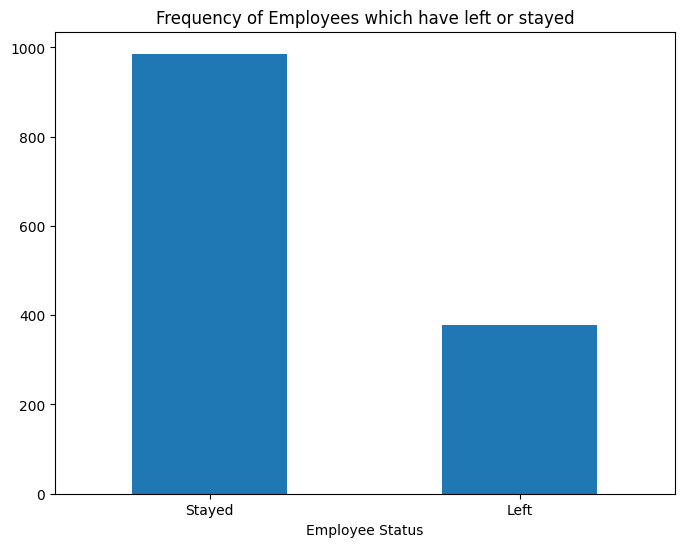

In [75]:
plt.figure(figsize=(8, 6))
dataset['leave'].value_counts().plot(kind='bar')
plt.title('Frequency of Employees which have left or stayed')
plt.xlabel('Employee Status')
plt.xticks(ticks=[0, 1], labels=['Stayed', 'Left'], rotation=0)
plt.show()


Here we plot to see how many employees stayed or left the company. We can see that the target feature leave here is not evenly distributed in that the number of employees who stayed where more than double those who had left. And this large data imbalance will affect later analyses. 

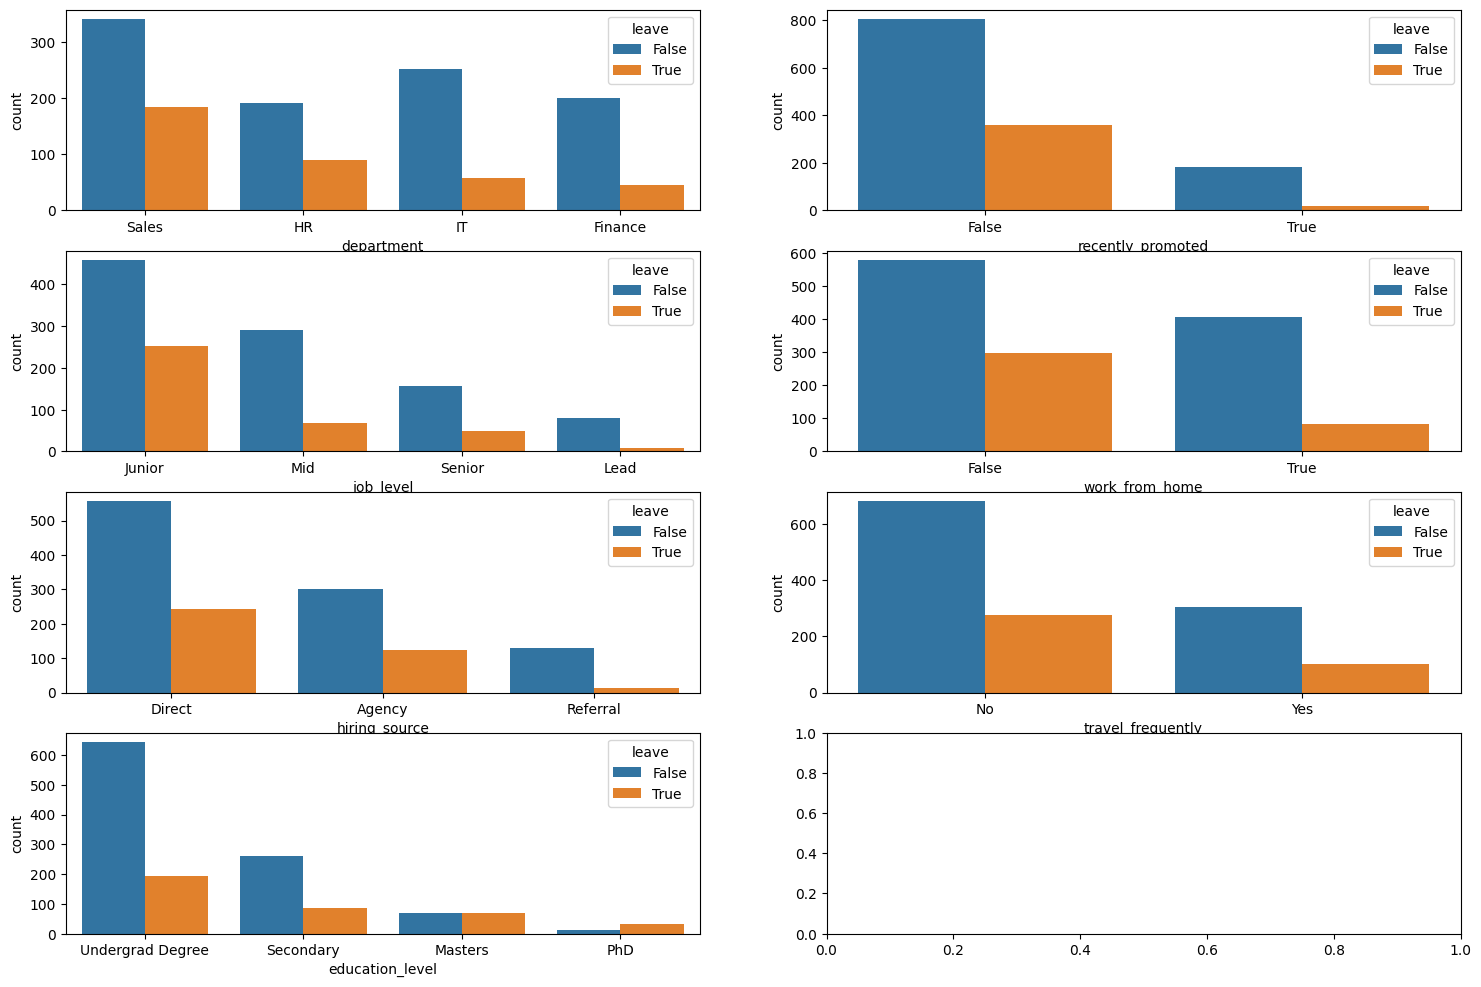

In [ ]:
# Create bar plots for each categorical feature
# Sources Used: https://aparnamishra144.medium.com/data-visualization-in-a-loop-using-seaborn-and-matplotlib-499ee540726d
# https://stackoverflow.com/questions/46623583/order-categories-by-count-in-a-countplot

fig,axes = plt.subplots(4,2,figsize=(18, 12))
col_count=0
row_count=0
#Loop trhough all categorical columns
for col in categorical_columns:
    #Skip the following two features
    if col == 'employee_id' or col=='leave':
        continue
    else:
        sns.countplot(hue=dataset['leave'],data=dataset, x=dataset[col],ax=axes[col_count][row_count],order=dataset[dataset['leave'] == True][col].value_counts().index)
        #Update row and column counts
        if col_count==3:
            col_count=0
            row_count+=1
        else:
            col_count+=1
plt.show()



Explanation of Charts

Graph 1: The people who left the most were from the Sales department followed by HR, It and Finance. However, Sales also had the most employees staying followed by IT, HR and Finance. This could be because Sales are paid in commission rather than a steady paycheck compared to other departments hence, more likely to leave than the others. But because they could potentially get a big paycheck, there is more incentive to stay. 

Graph 2: If you were recently promoted, you were less likely to leave as you would theoretically be making more money. Howvever, if one looks at the not recently promoted, one was more likely to stay than leave despite it being more likely to leave if one wasnt promoted than if one was promoted. This could be due to a lack of better opportunities or decent pay.

Graph 3: As progresses in their job level, one is more likely to stay than they are to leave. This is because not only are higher paying jobs more stable, they are also harder to find hence reluctance to leave.

Graph 4: One is more likely to leave if they dont have a work from home option than if they work from home. Again, as with above, more people stayed in the company even if they didnt work from home. So while one is more likely to leave if they dont work from home, because the data is imbalanced it is hard to say how well they are linked. 

Graph 5: The graph shows us that Direct Hires not only are the most likely to leave, they are the most likly to stay as well as they had the highest counts in both of them.

Graph 6: One is more likely to leave if they donttravel frequently. Again, as with above, more people stayed in the company even if they didnt travel frequently. So while one is more likely to leave if they dont travel frequently, because the data is imbalanced it is hard to say how well they are linked. 

Graph 7: As progresses in their academic life, one is more likely to stay than they are to leave. However, if one is more likely to leave than stay if they have an Undergraduate Degree in comparison to a Secondary School Degree



C:\Users\sanad\AppData\Local\Temp\ipykernel_6124\3999805546.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = dataset.groupby(['temp'+ col, 'leave']).size().unstack(fill_value=0)
C:\Users\sanad\AppData\Local\Temp\ipykernel_6124\3999805546.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = dataset.groupby(['temp'+ col, 'leave']).size().unstack(fill_value=0)
C:\Users\sanad\AppData\Local\Temp\ipykernel_6124\3999805546.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current


Correlation Matrix:
                     age    salary  company_years  career_years  distance  \
age            1.000000  0.520783       0.395824      0.665395 -0.126096   
salary         0.520783  1.000000       0.460491      0.621605 -0.081848   
company_years  0.395824  0.460491       1.000000      0.637256 -0.086433   
career_years   0.665395  0.621605       0.637256      1.000000 -0.109284   
distance      -0.126096 -0.081848      -0.086433     -0.109284  1.000000   
leave         -0.411821 -0.194508      -0.291402     -0.327433  0.284214   

                  leave  
age           -0.411821  
salary        -0.194508  
company_years -0.291402  
career_years  -0.327433  
distance       0.284214  
leave          1.000000  


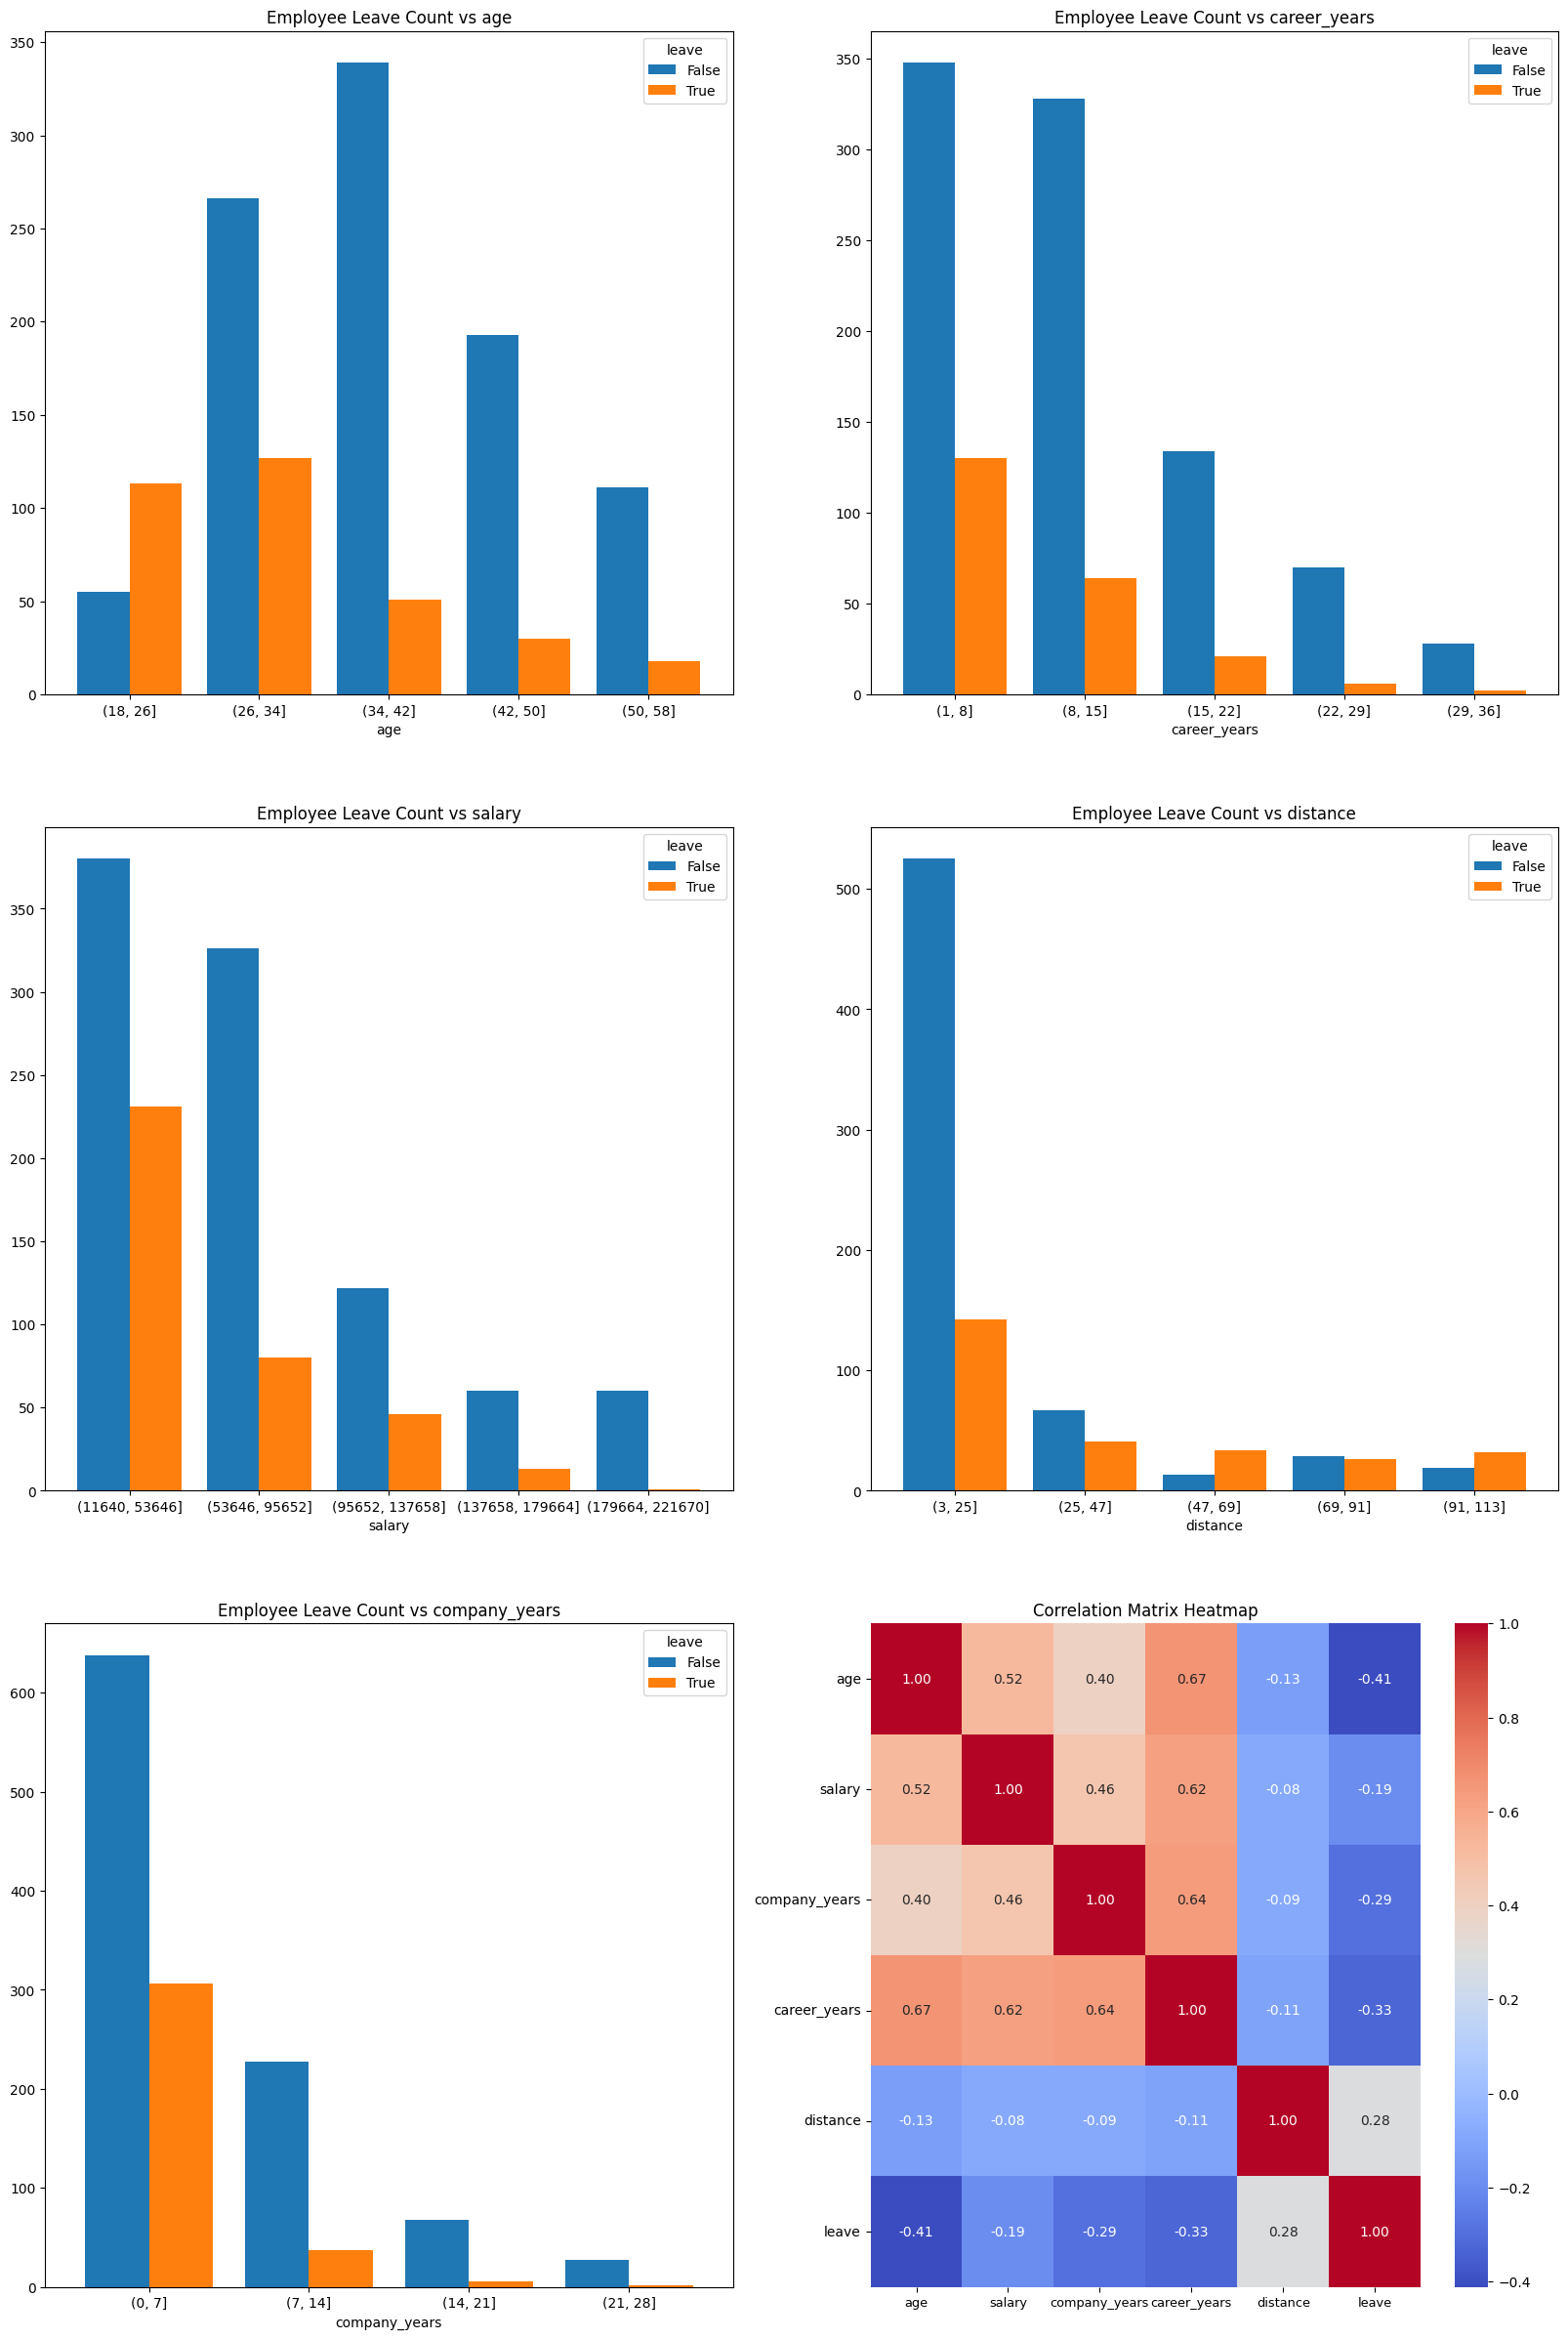

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

In [ ]:
# Create bar plots for each numerical feature
# Sources Used:https://stats.stackexchange.com/questions/798/calculating-optimal-number-of-bins-in-a-histogram
# https://stackoverflow.com/questions/43005462/pandas-bar-plot-with-binned-range
# https://stackoverflow.com/questions/62963174/make-bar-chart-with-binned-x-values-python

fig,axes = plt.subplots(3,2,figsize=(20, 30))
col_count=0
row_count=0
# Loop through all numerical columns
for col in numerical_columns:
    if col == 'employee_id':
        continue

    #Get the highest and lowest possible valyes
    max=int(dataset[col].max())
    min=int(dataset[col].min())

    #Using the above source, bin the data and create a temporary columns to store said binned data for plotting a binner bar grah
    bin_edges = range(min,max , ceil(2*(max-min)*len(dataset)**(-1/3)))
    dataset['temp'+ col] = pd.cut(dataset[col], bin_edges)
    #Group teh data by teh targe feature
    grouped_data = dataset.groupby(['temp'+ col, 'leave']).size().unstack(fill_value=0)
    # Plot the binned bar graph
    plt.figure(figsize=(12, 6))
    grouped_data.plot(kind='bar', width=0.8,ax=axes[col_count][row_count])

    axes[col_count][row_count].set_title('Employee Leave Count vs ' + col)
    axes[col_count][row_count].tick_params(axis='x', rotation=0)
    axes[col_count][row_count].set_xlabel(col)
    #Update row and column counts for teh dubplot
    if col_count==2:
            col_count=0
            row_count+=1
    else:
            col_count+=1
    dataset= dataset.drop(columns=['temp'+col])


# Convert the boolean target column to integers such that true is 1 and false is 0 to be used fr a correlation matrix
dataset['leave'] = dataset['leave'].astype(int)
numerical_df = dataset.select_dtypes(include=['float64', 'int64'])
# Display the correlation matrix and plot it in a heat map to visualize it better
print("\nCorrelation Matrix:\n", numerical_df.corr())
plt.figure(figsize=(15, 8))
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True,ax=axes[2][1])
axes[2][1].set_title('Correlation Matrix Heatmap')
axes[2][1].tick_params(axis='x', rotation=0, labelsize=9.3)
axes[2][1].tick_params(axis='y', rotation=0)


#Return the value into a bool
dataset['leave'] = dataset['leave'].astype(bool)

plt.show()





Before we plot the graphs, using the sources I included, I created a temporary columns that will be dropped later. These temporary column will be used to hold the binned data. I chose to bin the data here because it would be easier to visualise the data in bins asa opposed to the data being separate.

Explanation of graphs

Graph 1: People between the ages of 18 and 26 had more leavers than employees who stayed so pople between those ages are likely to leave. People aged between 26 and 34 had the highest total leavers but there where double that amount of employees who stayed. people aged between 18-34 are relatively early in their career so they will constatnly look for better opporunities/stay in a company justto get expeiene and then leave as soon as they get a better job.  After that, the number of leavers began to decrease as age increased. This is because after a certain age, it is harder to find a job with better opportunties, thus are likely content in staying in the same area, especially as they would likely have senior positions. On the other hand, one interesting thing to note is that the number of people who stayed followed a bell shape with the peak being around 34-42 age bracket.


Graph 2: People who had a only a few years in their career were the most likely to leave but they also had the most people stay in the company. However as a person has more years in their career, the less likely they are to leave


Graph 3: As a person earns a higher salary, they less likely they are to leave. However, there is significantly less employees who earn a high salary. When someone earns more than 53646, the number of people who left dropped by more than half.


Graph 4: This graph is interesting. People who live between 3 and 25 km(assuming this is in kilometers) away from their work are the least likely to leave (having the highest count), but they also have the highest leave count. However, if tehy live between 47 and 69 km away from their work, they have more people who left than stayed. Whereas anything past those distances, they are more or less evenly distributed with far distances only having a few people who left more than those who stayed. Those closer to the


Graph 5: People who had a few years in the company were the most likely to leave but they also had the most people stay in the company. However as a person stays longer in the company, the less likely they are to leave. This is because when one had a few years in a company, the likely stay to get experience and then leave if a better opporunity arises, however, if they stay in the same company for a long time, they are less liekly to leave due to content.

Correlation Matrix: Using the correlation matrix, we can see age has the strongest negative correlation with leave followed by career_years. Salary appears to have a weak negative correlation with it. Distance has the highest positive correlation but it is rather low(0.28) and when comparing its correlation to other variables, it has really low correlation. We can see that all other features have a really strong correlation with each except distance as they have values above 0.4

In [ ]:

y = dataset['leave']
x = dataset.drop(columns=['leave','employee_id']) 


# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


# Initialize and train the HistGradientBoostingClassifier
model = HistGradientBoostingClassifier(categorical_features=['education_level','department','job_level','hiring_source','recently_promoted','travel_frequently','work_from_home'])
model.fit(x_train, y_train)

# Evaluate the model
y_pred = model.predict(x_test)
print("Performance with All Features:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Performance with All Features:
Accuracy: 0.8463414634146341
              precision    recall  f1-score   support

       False       0.86      0.94      0.90       299
        True       0.79      0.59      0.68       111

    accuracy                           0.85       410
   macro avg       0.82      0.77      0.79       410
weighted avg       0.84      0.85      0.84       410



In [ ]:
#Drop the following features
x = dataset.drop(columns=['work_from_home','travel_frequently','leave','employee_id','career_years']) 

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


# Initialize and train the HistGradientBoostingClassifier
model = HistGradientBoostingClassifier(categorical_features=['education_level','department','job_level','hiring_source','recently_promoted'])
model.fit(x_train, y_train)

# Evaluate the model
y_pred = model.predict(x_test)
print("Performance with Dropped Features:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Performance with Dropped Features:
Accuracy: 0.8536585365853658
              precision    recall  f1-score   support

       False       0.87      0.94      0.90       299
        True       0.80      0.61      0.69       111

    accuracy                           0.85       410
   macro avg       0.83      0.78      0.80       410
weighted avg       0.85      0.85      0.85       410



After dropping 'work_from_home','travel_frequently', 'employee_id'and 'career_years', we can see we acually get an increase in Accuracy, recall and F1 scores for True values. The reason I chose these values to drop is because for both work-from-home and travel_frequently, they both showed similar trends but also due to data imbalance, it was hard to conclusively save that there was a link to the target feature. I dropped employee_ID since the feature was mainly there to identify workers, hence not having any role in prediction. Finally, I chose to drop career_years because other features played similar roles to it (such as company years) and, while it appars important, running the model with it included showed a negligible decrease in nearly every metric with a decreased accuracy of around .5%, hence it has it not being needed in the model.